In [3]:
import numpy as np
from scipy.io import loadmat

In [18]:
file = loadmat('../data/Sample_PPG_MAT_125Hz.mat', struct_as_record = False, squeeze_me = True)

fs = file['Fs']
values = file['Data']
n = len(values)
delta_t = 1/fs
time = np.linspace(0, n*delta_t, len(values))

values_window = values[:1000]
time_window = time[:1000]

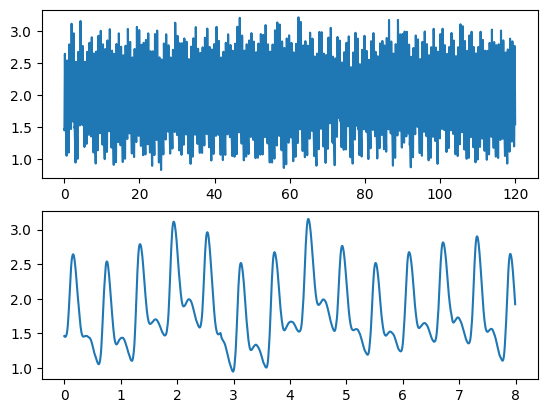

In [19]:
import matplotlib.pyplot as plt

plt.figure()
plt.subplot(2,1,1)
plt.plot(time, values)
plt.subplot(2,1,2)
plt.plot(time_window, values_window)
plt.show()

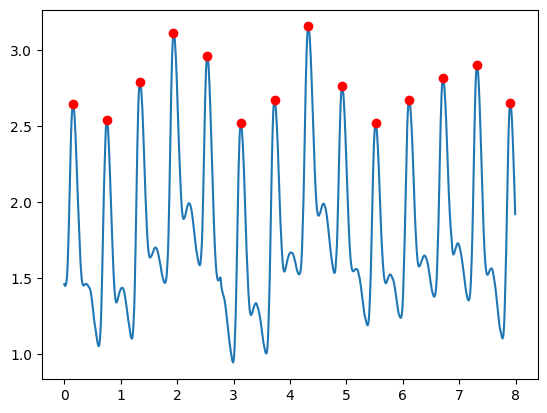

100.53846153846153


In [50]:
from scipy.signal import find_peaks

peaks, props = find_peaks(values_window, distance=fs*0.34, prominence=0.2, height=2.0)
plt.figure()
plt.plot(time_window,values_window, label="PPG")

plt.plot(time_window[peaks], values_window[peaks], 'ro', label="Detected peaks")
plt.show()

HR = np.zeros_like(peaks)
for peak in range(len(peaks)-1):
    HR[peak] = 60/((peaks[peak+1] - peaks[peak])/fs)

HR = HR[:-1]
avg_hr = np.sum(HR)/len(HR)
print(avg_hr)